In [1]:
pip install tmdbsimple


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tmdbsimple as tmdb

tmdb.API_KEY = "864b97e0481ef59b6a1117399f79e2f8"

search = tmdb.Search()
response = search.movie(query="Transformers")

for result in search.results:
    print(result["title"], "-", result["release_date"])


Transformers - 2007-06-27
Transformers: Five Faces of Darkness - 1986-09-15
Transformers: Scramble City - 1986-04-01
Transformers One - 2024-09-11
Transformers: Rise of the Beasts - 2023-06-06
Transformers: Age of Extinction - 2014-06-25
Transformers: Zone - 1990-07-21
The Making of Transformers the Premake - 2020-05-05
Transformers: The Last Knight - 2017-06-16
The Transformers: The Movie - 1986-08-08
Transformers: The Premake - 2014-10-28
The Transformers: More Than Meets the Eye - 1986-01-01
Transformers:Robot Masters - 2006-01-01
Transformers: 40th Anniversary Event - 2024-04-10
Transformers: The Return of Optimus Prime - 1987-11-17
Transformers: Revenge of the Fallen - 2009-06-19
Transformers: Dark of the Moon - 2011-06-28
Transformers: Combiner Wars - 2016-08-02
Transformers Prime: Beast Hunters - Predacons Rising - 2013-10-04
Transformation - 1988-01-01


In [2]:
import requests

api_key = "864b97e0481ef59b6a1117399f79e2f8"
movie_id = 1858

url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US"

response = requests.get(url)
data = response.json()

print(data)


{'adult': False, 'backdrop_path': '/77P56ZcL8M9Cw7FIptMIGjhNJoj.jpg', 'belongs_to_collection': {'id': 8650, 'name': 'Transformers Collection', 'poster_path': '/nnFgBA6nR0pHorxdFaDvdY4nVHL.jpg', 'backdrop_path': '/rkLyg9ClVRtfCAu89y2sxTCOjvt.jpg'}, 'budget': 150000000, 'genres': [{'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}], 'homepage': 'https://www.paramountmovies.com/movies/transformers', 'id': 1858, 'imdb_id': 'tt0418279', 'origin_country': ['US'], 'original_language': 'en', 'original_title': 'Transformers', 'overview': 'Young teenager Sam Witwicky becomes involved in the ancient struggle between two extraterrestrial factions of transforming robots – the heroic Autobots and the evil Decepticons. Sam holds the clue to unimaginable power and the Decepticons will stop at nothing to retrieve it.', 'popularity': 3.0431, 'poster_path': '/1P7w3AImoEOWJX7nn3fdaKDfEQA.jpg', 'production_companies': [{'id': 7, 'logo_path': '/vru2SssLX3FP

In [3]:
title = data['title']
title

'Transformers'

In [4]:
runtime = data['runtime']
runtime

144

In [5]:
popularity = data['popularity']
popularity

3.0431

In [6]:
genres = data['genres']
genres

[{'id': 12, 'name': 'Adventure'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 28, 'name': 'Action'}]

In [7]:
raw_df = {
    "Title": [title],
    "Runtime": runtime,
    "Popularity": popularity,
    "Genres": [genres]
}

In [8]:
import pandas as pd
df = pd.DataFrame(raw_df)
df.head()

,Title,Runtime,Popularity,Genres
0,Transformers,144,3.0431,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ..."


# Question:

What is the probability that a random sample of 10 movies will have a mean popularity score greater than 8?

In [9]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [16]:
# Theoretical Probability, assuming a mean of 5 and standard deviation of 2:
t_mean = 5
t_stdev = 2

z_lower = (8-t_mean)/t_stdev
z_upper = (10-t_mean)/t_stdev

from scipy.stats import norm
# Use norm.cdf() instead of z_score_to_percentile
# norm.cdf() converts z-scores to cumulative probabilities
p_upper = norm.cdf(z_upper)
p_lower = norm.cdf(z_lower)
p_total = p_upper - p_lower
print("The theoretical probability is ", p_total)

The theoretical probability is  0.060597535943081926


✅ Page 197 -> collected 20 unique movies.
✅ Page 120 -> collected 40 unique movies.
✅ Page 283 -> collected 60 unique movies.
✅ Page 376 -> collected 80 unique movies.
✅ Page 177 -> collected 99 unique movies.
✅ Page 414 -> collected 118 unique movies.
✅ Page 171 -> collected 138 unique movies.
✅ Page 82 -> collected 158 unique movies.
✅ Page 67 -> collected 176 unique movies.
✅ Page 313 -> collected 196 unique movies.
✅ Page 480 -> collected 216 unique movies.
✅ Page 344 -> collected 236 unique movies.
✅ Page 270 -> collected 256 unique movies.
✅ Page 297 -> collected 276 unique movies.
✅ Page 115 -> collected 296 unique movies.
✅ Page 218 -> collected 316 unique movies.
✅ Page 471 -> collected 336 unique movies.
✅ Page 88 -> collected 356 unique movies.
✅ Page 235 -> collected 376 unique movies.
✅ Page 161 -> collected 396 unique movies.
✅ Page 497 -> collected 416 unique movies.
✅ Page 445 -> collected 435 unique movies.
✅ Page 69 -> collected 454 unique movies.
✅ Page 442 -> collec

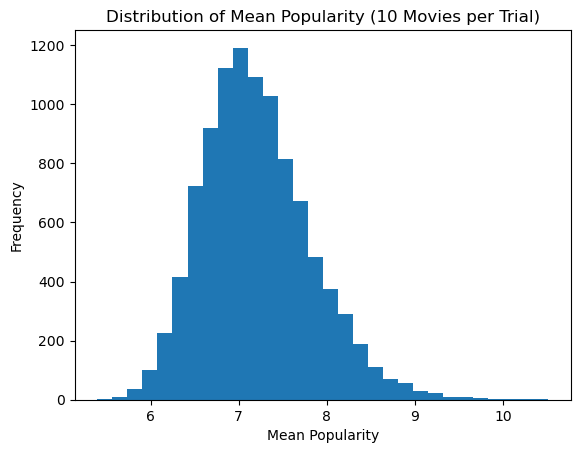

In [10]:
import requests
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Fetch ~1000 random unique movies ---
API_KEY = "864b97e0481ef59b6a1117399f79e2f8"
BASE_URL = "https://api.themoviedb.org/3"

movies = []
seen_ids = set()

# Pick random pages from the discover endpoint (1–500)
random_pages = random.sample(range(1, 501), 60)
count = 0

for page in random_pages:
    url = f"{BASE_URL}/discover/movie"
    params = {
        "api_key": API_KEY,
        "page": page,
        "sort_by": "popularity.desc"
    }
    response = requests.get(url, params=params)
    if response.status_code != 200:
        print(f"⚠️ Page {page} failed: {response.status_code}")
        continue

    data = response.json()
    if "results" not in data:
        print(f"⚠️ No results on page {page}")
        continue

    for m in data["results"]:
        if m["id"] not in seen_ids:
            seen_ids.add(m["id"])
            movies.append({
                "id": m["id"],
                "title": m["title"],
                "release_date": m.get("release_date"),
                "popularity": m.get("popularity"),
                "vote_average": m.get("vote_average"),
                "vote_count": m.get("vote_count")
            })

    count += 1
    print(f"✅ Page {page} -> collected {len(movies)} unique movies.")
    time.sleep(0.25)  # stay under rate limit

    if len(movies) >= 1000:
        break

movies = movies[:1000]
df = pd.DataFrame(movies)
print(f"\n🎉 Done! Collected {len(df)} unique movies.")

# --- Step 2: Run 1000 trials of random samples of 10 movies each ---

n_trials = 10000
sample_size = 10
means = []

for i in range(n_trials):
    sample = df.sample(sample_size, replace=False)
    mean_popularity = sample["popularity"].mean()
    means.append(mean_popularity)

results = pd.DataFrame({
    "trial": range(1, n_trials + 1),
    "mean_popularity": means
})

# --- Step 3: Display & analyze results ---

print("\nSummary statistics:")
print(results["mean_popularity"].describe())

# Optional: visualize the distribution
plt.hist(results["mean_popularity"], bins=30)
plt.title("Distribution of Mean Popularity (10 Movies per Trial)")
plt.xlabel("Mean Popularity")
plt.ylabel("Frequency")
plt.show()


In [15]:
# Import the required statistics functions
from statistics import mean, stdev
from scipy.stats import norm

# Calculate mean and standard deviation of the means
e_mean = mean(means)  # Make sure 'means' is defined before this line
e_std = stdev(means)

# Calculate z-scores
zUpper = (10-e_mean)/e_std
zLower = (8-e_mean)/e_std

# Calculate probabilities using the normal CDF
pUpper = norm.cdf(zUpper)
pLower = norm.cdf(zLower)
pTotal = pUpper - pLower

print("The empirical probability is ", pTotal)

The empirical probability is  0.09714726239890481


# Answer:

In conclusion, the empirical probability that a random sample of 10 movies will have a mean popularity score greater than 8 is 0.0971472623989048, which isn't much higher than the theoretical probability of 0.060597535943081926. The distribution of this graph is approximately normal, with a mean of 7.2 and a standard deviation of 0.6136.